In [21]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("California-Housing-ML"):
    raise ValueError("Please change working directory to 'path/toCalifornia-Housing-ML' before proceeding")
!pip install -r requirements.txt

Current working directory:  /Users/irellzane/MLprojects/California-Housing-ML


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
housing = pd.read_csv("data/housing_train.csv", index_col=0)
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity  
13096        NEAR BAY  
14973       <1H OCEAN  
3785           INLAND  
14689          INLAND  
20507      NEAR OCEAN

## Visualize Data

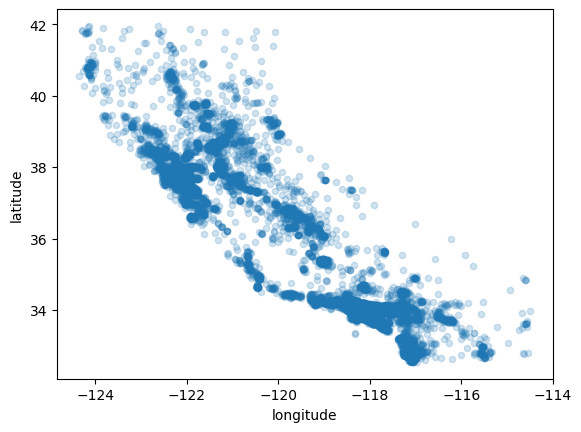

In [26]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.2)
plt.show()

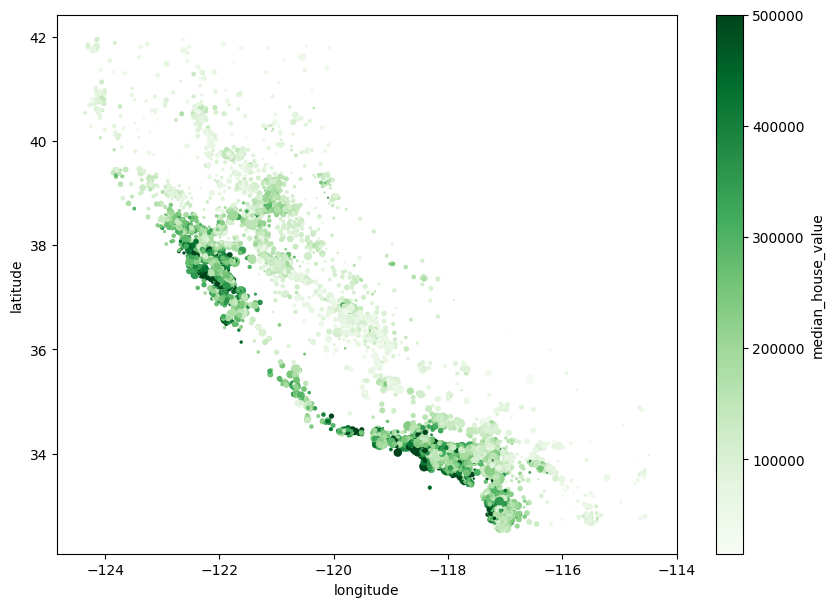

In [66]:
housing.plot.scatter(x="longitude", y="latitude",
                     s=housing["population"]/200,
                     c="median_house_value", cmap="Greens",
                     legend=True, figsize=(10, 7)
                     )
plt.show()

## Study Correlations

In [73]:
correlations = housing.corr(numeric_only=True)
correlations

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924213           -0.102937     0.044558   
latitude            -0.924213  1.000000            0.005692    -0.036753   
housing_median_age  -0.102937  0.005692            1.000000    -0.361710   
total_rooms          0.044558 -0.036753           -0.361710     1.000000   
total_bedrooms       0.068210 -0.066391           -0.317978     0.930076   
population           0.104236 -0.115677           -0.301906     0.863967   
households           0.054261 -0.071604           -0.300075     0.916143   
median_income       -0.016542 -0.078137           -0.127043     0.197720   
median_house_value  -0.050859 -0.139584            0.102175     0.137455   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068210    0.104236    0.054261      -0.016542   
latitude                 -0.066391   -0.115677   -0.071604      -0.078137   
housing_median_age       -0.317978   -0.301906   -0.300075      -0.127043   
total_rooms               0.930076    0.863967    0.916143       0.197720   
total_bedrooms            1.000000    0.886200    0.978822      -0.006038   
population                0.886200    1.000000    0.916237       0.004282   
households                0.978822    0.916237    1.000000       0.013637   
median_income            -0.006038    0.004282    0.013637       1.000000   
median_house_value        0.054635   -0.020153    0.071426       0.688380   

                    median_house_value  
longitude                    -0.050859  
latitude                     -0.139584  
housing_median_age            0.102175  
total_rooms                   0.137455  
total_bedrooms                0.054635  
population                   -0.020153  
households                    0.071426  
median_income                 0.688380  
median_house_value            1.000000

In [86]:
correlations[["median_house_value"]].sort_values(by="median_house_value", ascending=False)

median_house_value
median_house_value            1.000000
median_income                 0.688380
total_rooms                   0.137455
housing_median_age            0.102175
households                    0.071426
total_bedrooms                0.054635
population                   -0.020153
longitude                    -0.050859
latitude                     -0.139584

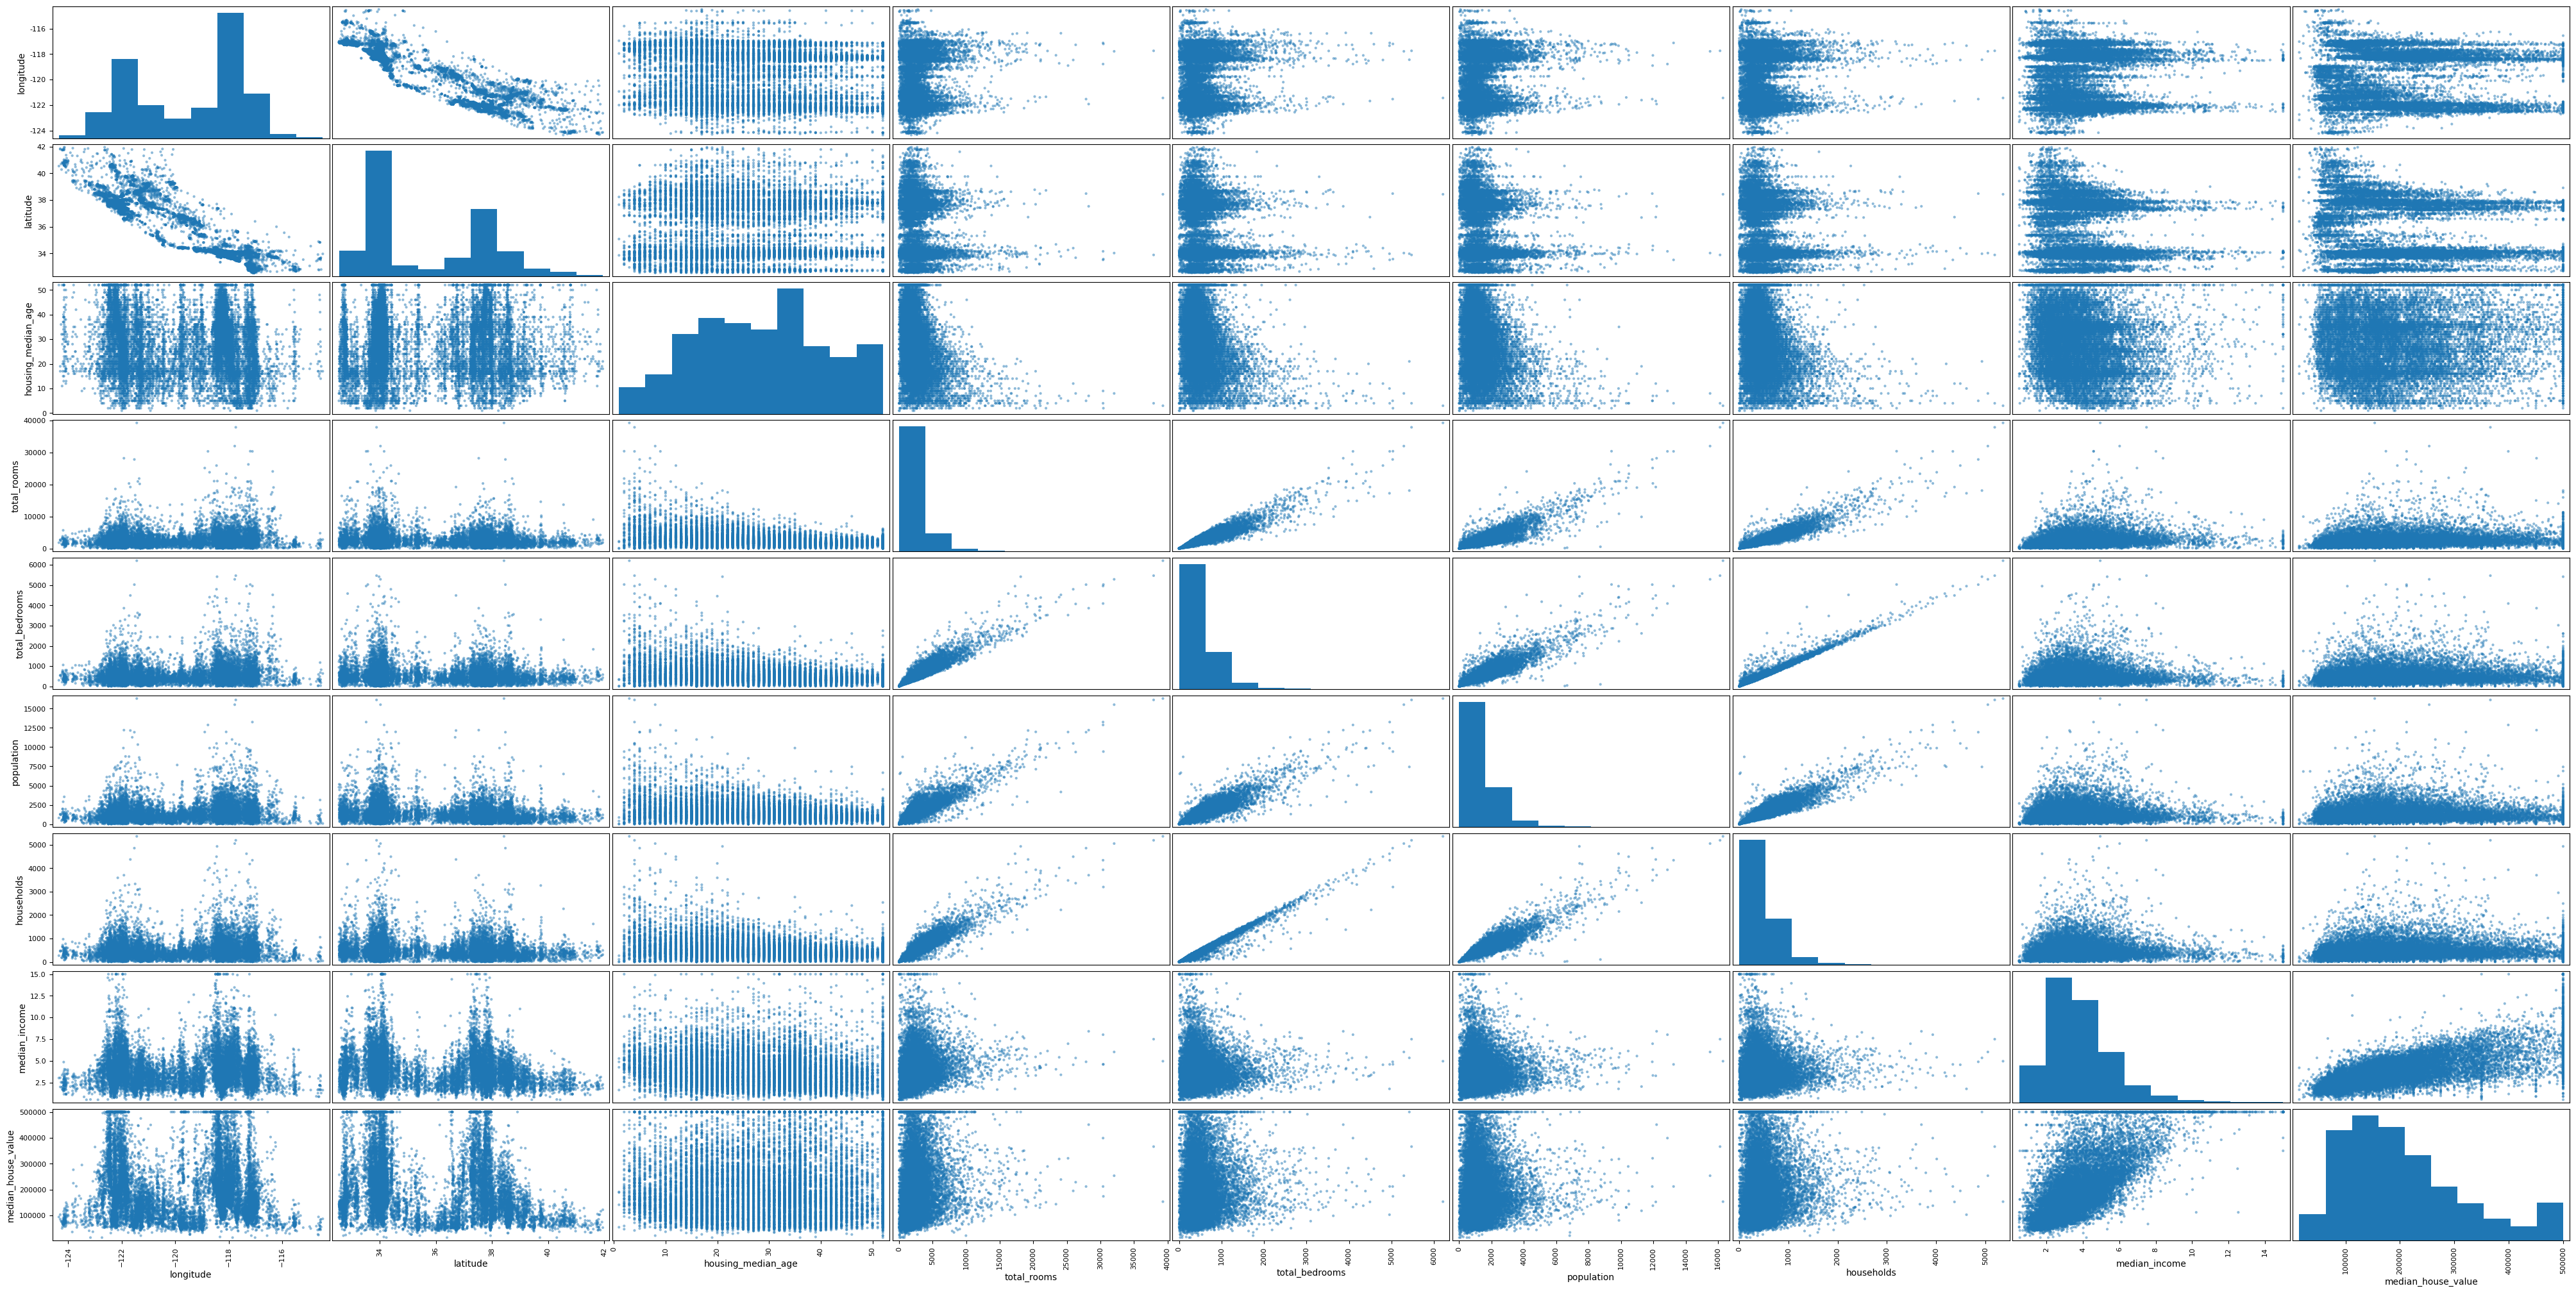

In [103]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(40, 20))
plt.tight_layout(pad=0.1)
plt.show()

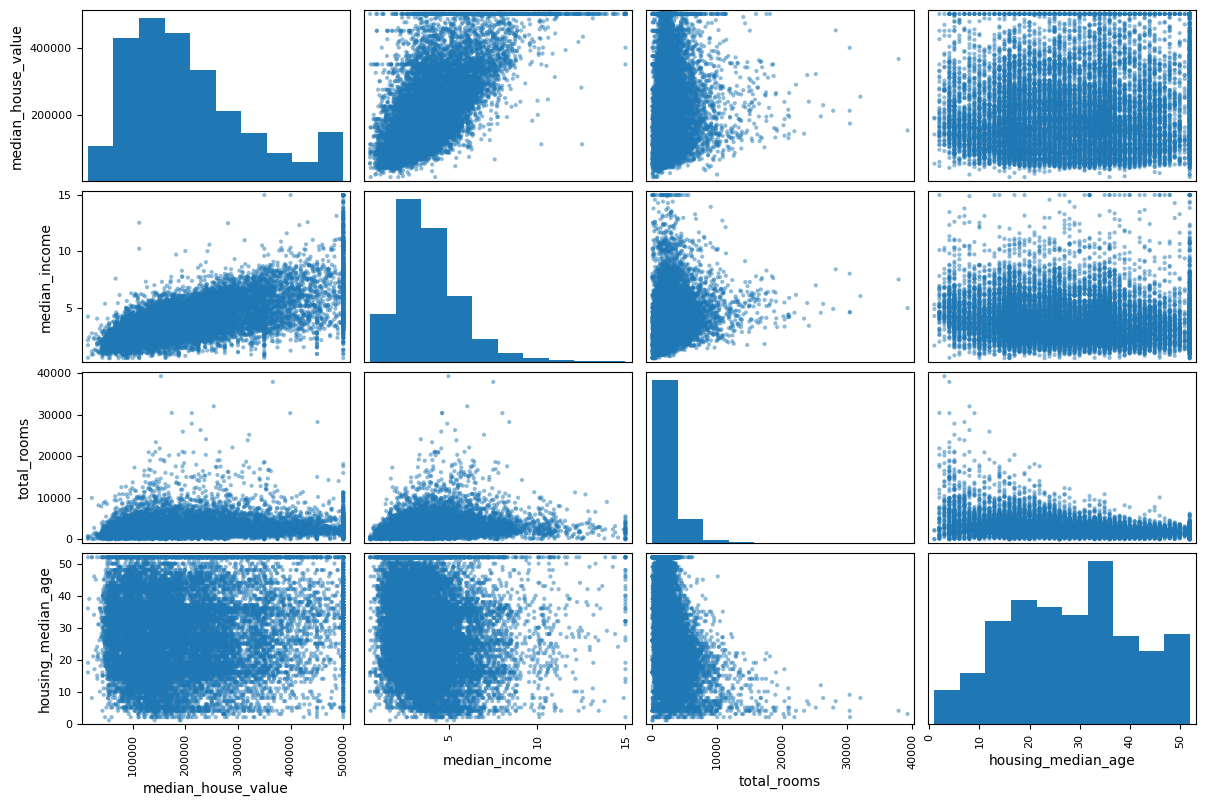

In [105]:
correl_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[correl_attributes], figsize=(12, 8))
plt.tight_layout(pad=0.5)
plt.show()